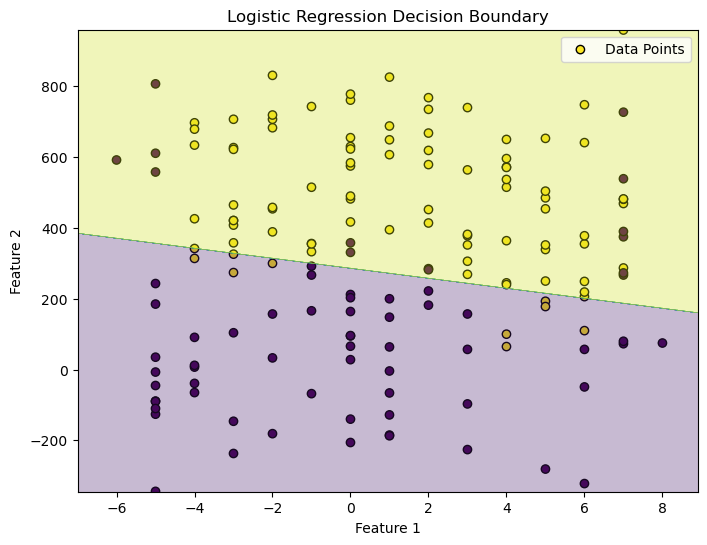

Accuracy: 0.9


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv("data.csv", header=None, names=['Feature1', 'Feature2', 'Label'])

# Split the dataset into features (X) and Target (y)
X = data[['Feature1', 'Feature2']]
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(X_train['Feature1'], X_train['Feature2'], c=y_train, cmap='viridis', edgecolors='k', label='Data Points')

# Plot the decision boundary
x_min, x_max = X_train['Feature1'].min() - 1, X_train['Feature1'].max() + 1
y_min, y_max = X_train['Feature2'].min() - 1, X_train['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = log_reg_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.show()

# Evaluate the model on the testing data
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Iteration 0: Cost 3.215392043273643
Iteration 1000: Cost 1.3282101784725917
Iteration 2000: Cost 3.226113365597875
Iteration 3000: Cost 3.0490231128905423
Iteration 4000: Cost 3.1581474508652625


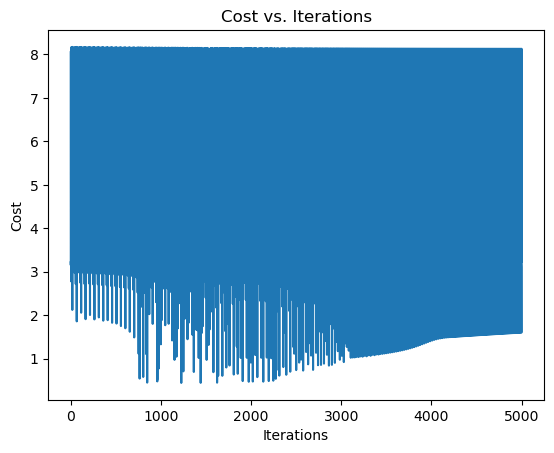

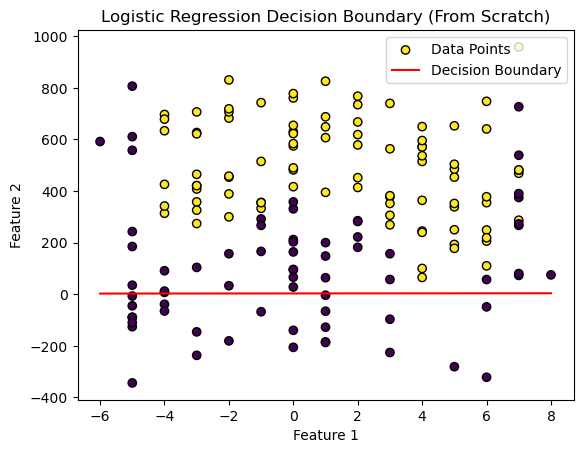

Accuracy: 0.725


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function (binary cross-entropy)
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # To prevent division by zero
    cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    costs = []
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= learning_rate * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return theta, costs

# Load the dataset
data = np.genfromtxt('data.csv', delimiter=',')

# Extract features and labels
X = data[:, :2]  # Features
y = data[:, 2]   # Labels

# Add intercept term to X
X = np.hstack((np.ones((len(y), 1)), X))

# Split the dataset into training and testing sets (use the same splits as in Part A)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize parameters
theta = np.zeros(X_train.shape[1])

# Set hyperparameters
learning_rate = 0.01
iterations = 5000

# Train the model
theta, costs = gradient_descent(X_train, y_train, theta, learning_rate, iterations)

# Plot cost over iterations
plt.plot(costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs. Iterations')
plt.show()

# Plot the data points
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train, cmap='viridis', edgecolors='k', label='Data Points')

# Plot the decision boundary
x_boundary = np.array([np.min(X_train[:, 1]), np.max(X_train[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]
plt.plot(x_boundary, y_boundary, color='red', label='Decision Boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary (From Scratch)')
plt.legend()
plt.show()

# Predictions on testing data
preds = sigmoid(np.dot(X_test, theta))
preds = (preds >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(preds == y_test)
print("Accuracy:", accuracy)


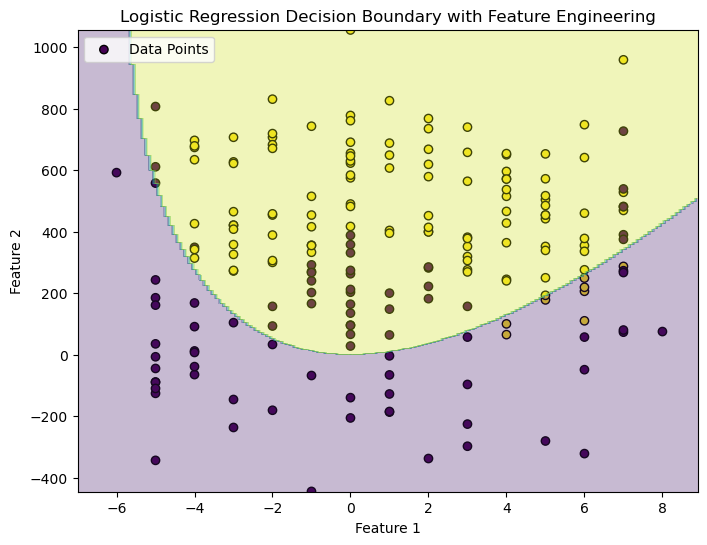

Accuracy: 0.825


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv("data.csv", header=None, names=['Feature1', 'Feature2', 'Label'])

# Enhance the dataset by adding new features (e.g., Feature1^2, Feature1 * Feature2)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_enhanced = poly.fit_transform(data[['Feature1', 'Feature2']])

# Split the enhanced dataset into features and labels
y = data['Label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=2)

# Initialize and train the logistic regression model with adjusted regularization strength (C)
#log_reg_model = LogisticRegression(C=0.1)  # Adjust C value as needed
#log_reg_model = LogisticRegression(solver='lbfgs')
log_reg_model = LogisticRegression(max_iter=500,C=1)

log_reg_model.fit(X_train, y_train)

# Plot the data points
plt.figure(figsize=(8, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Label'], cmap='viridis', edgecolors='k', label='Data Points')

# Plot the decision boundary
x_min, x_max = data['Feature1'].min() - 1, data['Feature1'].max() + 1
y_min, y_max = data['Feature2'].min() - 1, data['Feature2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = log_reg_model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary with Feature Engineering')
plt.legend()
plt.show()

# Evaluate the model on the testing data
y_pred = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


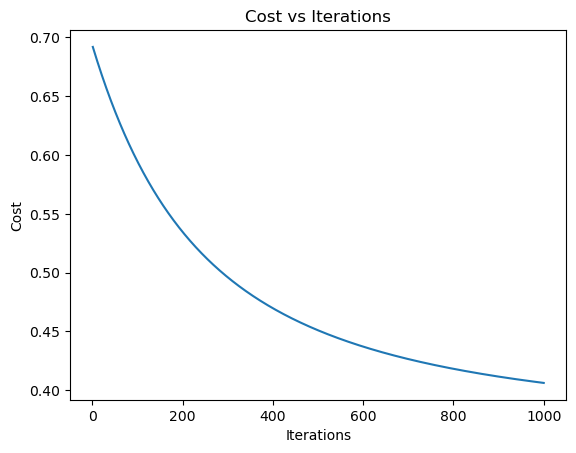

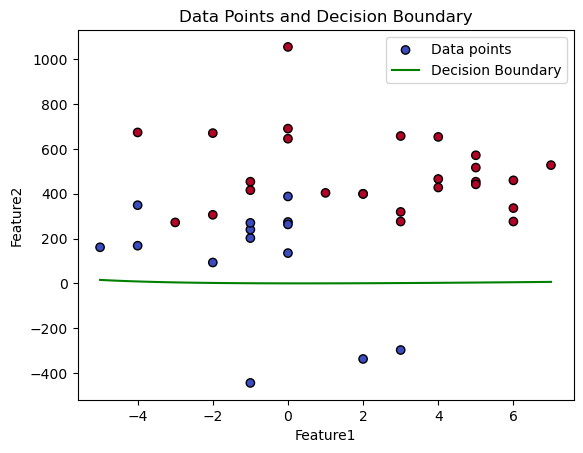

Accuracy on the testing set: 87.50%


In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("data.csv", header=None, names=['Feature1', 'Feature2', 'Label'])

# Add new features (e.g., Feature1^2, Feature1 * Feature2)
data['Feature1^2'] = data['Feature1'] ** 2
data['Feature1*Feature2'] = data['Feature1'] * data['Feature2']

# Split the dataset into features (X) and Target (y)
X = data[['Feature1', 'Feature2', 'Feature1^2', 'Feature1*Feature2']]
y = data['Label']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1 / m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

# Initialize theta with zeros
theta = np.zeros(X_train_scaled.shape[1] + 1)  # Add one for the intercept term

# Add intercept term to X_train_scaled
X_train_scaled = np.hstack((np.ones((X_train_scaled.shape[0], 1)), X_train_scaled))

# Hyperparameters
alpha = 0.01
iterations = 1000

# Train the model
theta, cost_history = gradient_descent(X_train_scaled, y_train, theta, alpha, iterations)

# Plot cost over iterations
plt.plot(range(1, iterations + 1), cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost vs Iterations')
plt.show()

# Predict function
def predict(X, theta):
    probabilities = sigmoid(np.dot(X, theta))
    return [1 if x >= 0.5 else 0 for x in probabilities]

# Add intercept term to X_test_scaled
X_test_scaled = np.hstack((np.ones((X_test_scaled.shape[0], 1)), X_test_scaled))

# Make predictions on test set
predictions = predict(X_test_scaled, theta)



# Extract coefficients from theta
theta_0, theta_1, theta_2, theta_3, theta_4 = theta

# Plot data points
plt.scatter(X_test['Feature1'], X_test['Feature2'], c=y_test, cmap='coolwarm', edgecolors='k', label='Data points')

# Plot decision boundary
x1_values = np.linspace(X_test['Feature1'].min(), X_test['Feature1'].max(), 100)
x2_values = -(theta_0 + theta_1 * x1_values + theta_3 * x1_values**2) / (theta_2 + theta_4 * x1_values)
plt.plot(x1_values, x2_values, color='green', label='Decision Boundary')

plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Data Points and Decision Boundary')
plt.legend()
plt.show()



# Calculate accuracy
accuracy = np.mean(predictions == y_test) * 100
print(f"Accuracy on the testing set: {accuracy:.2f}%")
